# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [140]:
# Data import
import pandas as pd
import numpy as np

data = pd.read_csv('Wholesale_Data.csv')

In [141]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [142]:
# Assess data types, check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [143]:
# Check for duplicate rows in the dataset
duplicate_rows = data.duplicated()
num_duplicate_rows = duplicate_rows.sum()

num_duplicate_rows

0

In [144]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


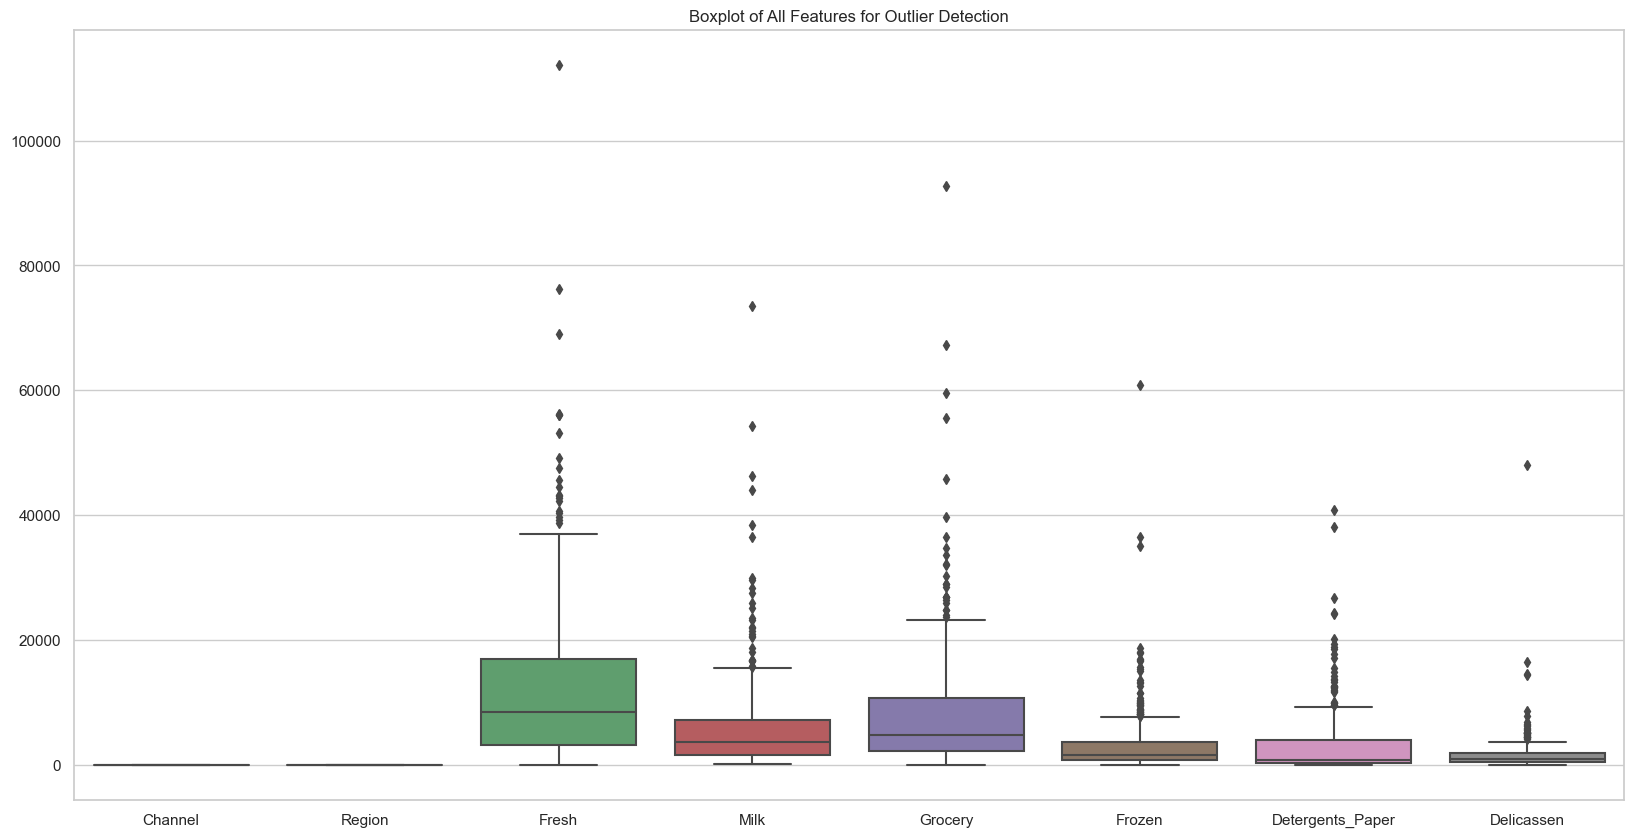

In [145]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create boxplots for each feature to visually inspect outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.title("Boxplot of All Features for Outlier Detection")
plt.show()

In [146]:
# Are outliers disproportionately common in certain columns?

# Calculate IQR for each column to identify outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Count outliers per column
outliers_count_per_column = outliers.sum()

# Identify rows where outliers exist
outliers_rows = outliers.any(axis=1)
outliers_rows_indices = np.where(outliers_rows)[0]

# Count unique rows containing outliers
unique_outliers_rows_count = len(np.unique(outliers_rows_indices))

outliers_count_per_column, unique_outliers_rows_count

(Channel              0
 Region               0
 Fresh               20
 Milk                28
 Grocery             24
 Frozen              43
 Detergents_Paper    30
 Delicassen          27
 dtype: int64,
 108)

In [147]:
# Are outliers disproportionately common in certain rows?

# Count the number of columns with outliers for each row containing outliers
outliers_count_per_row = outliers.loc[outliers_rows].sum(axis=1)

# Summarize the distribution of the number of columns with outliers per row
outliers_columns_count_distribution = outliers_count_per_row.value_counts().sort_index()

outliers_columns_count_distribution

1    67
2    24
3    13
4     3
6     1
dtype: int64

In [148]:
# Compare variance to assess impact of removing outliers

# Calculate the variance for each column with all data points (including outliers)
variance_with_outliers = data.var()

# Remove rows containing outliers to calculate variance without them
data_without_outliers = data[~outliers_rows]
variance_without_outliers = data_without_outliers.var()

# Combine the two Series into a DataFrame for easier comparison
variance_comparison = pd.DataFrame({
    'Variance_With_Outliers': variance_with_outliers,
    'Variance_Without_Outliers': variance_without_outliers,
    'Variance_Change': ((variance_without_outliers - variance_with_outliers) / variance_with_outliers) * 100
})

variance_comparison

,Variance_With_Outliers,Variance_Without_Outliers,Variance_Change
Channel,2.190723e-01,2.048830e-01,-6.476993
Region,5.994978e-01,6.117552e-01,2.044603
Fresh,1.599549e+08,6.661549e+07,-58.353588
Milk,5.446997e+07,1.131181e+07,-79.232945
Grocery,9.031010e+07,2.539082e+07,-71.884848
Frozen,2.356785e+07,2.916890e+06,-87.623440
Detergents_Paper,2.273244e+07,5.510617e+06,-75.758793
Delicassen,7.952997e+06,6.795641e+05,-91.455246


In [149]:
# Assessing whether outliers represent high-spending clients,
# clients whose spending is focused in a specific category, 
# or something else.

# Calculate the mean and standard deviation for each column
mean_values = data.mean()
std_values = data.std()

# Select rows containing at least one outlier
data_outliers = data.loc[outliers_rows]

# Calculate the number of standard deviations from the mean for each value in the outlier rows
data_std_from_mean = (data_outliers - mean_values) / std_values

# Combine the original values and their respective number of standard deviations from the mean into a single DataFrame
data_outliers_info = pd.DataFrame()
for col in data.columns:
    data_outliers_info[f"{col}_Value"] = data_outliers[col]
    data_outliers_info[f"{col}_Std_From_Mean"] = data_std_from_mean[col]

data_outliers_info

,Channel_Value,Channel_Std_From_Mean,Region_Value,Region_Std_From_Mean,Fresh_Value,Fresh_Std_From_Mean,Milk_Value,Milk_Std_From_Mean,Grocery_Value,Grocery_Std_From_Mean,Frozen_Value,Frozen_Std_From_Mean,Detergents_Paper_Value,Detergents_Paper_Std_From_Mean,Delicassen_Value,Delicassen_Std_From_Mean
2,2,1.447005,3,0.589997,6353,-0.446521,8808,0.408073,7684,-0.028125,2405,-0.137379,3516,0.133080,7844,2.240742
4,2,1.447005,3,0.589997,22615,0.839284,5410,-0.052337,7198,-0.079266,3915,0.173661,1777,-0.231654,5185,1.297870
17,1,-0.689512,3,0.589997,5876,-0.484236,6157,0.048877,2933,-0.528064,839,-0.459955,370,-0.526755,4478,1.047170
22,1,-0.689512,3,0.589997,31276,1.524093,1917,-0.525619,4469,-0.366434,9408,1.305148,2381,-0.104972,4334,0.996108
23,2,1.447005,3,0.589997,26373,1.136422,36423,4.149752,22019,1.480320,5154,0.428879,4337,0.305275,16523,5.318286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1,-0.689512,3,0.589997,31012,1.503219,16687,1.475634,5429,-0.265415,15082,2.473919,439,-0.512284,1163,-0.128318
431,1,-0.689512,3,0.589997,8533,-0.274153,5506,-0.039329,5160,-0.293721,13486,2.145164,1377,-0.315549,1498,-0.009528
435,1,-0.689512,3,0.589997,29703,1.399719,12051,0.847482,16027,0.849793,13135,2.072862,182,-0.566186,2204,0.240817
436,1,-0.689512,3,0.589997,39228,2.152842,1431,-0.591469,764,-0.756304,4510,0.296223,93,-0.584853,2346,0.291170


In [150]:
# Removing unhelpful data points, calculating helpful data points,
# sorting data for analysis.

# Drop the columns related to 'Channel' and 'Region', as well as all the '*_Value' columns
cols_to_drop = [col for col in data_outliers_info.columns if 'Channel' in col or 'Region' in col or '_Value' in col]
data_outliers_info_filtered = data_outliers_info.drop(columns=cols_to_drop)

# Calculate the sum and average of standard deviations for all columns in each row
data_outliers_info_filtered['Sum_Std'] = data_outliers_info_filtered.sum(axis=1)
data_outliers_info_filtered['Avg_Std'] = data_outliers_info_filtered.mean(axis=1)

data_outliers_info_filtered.sort_values('Avg_Std', ascending=False).head()


,Fresh_Std_From_Mean,Milk_Std_From_Mean,Grocery_Std_From_Mean,Frozen_Std_From_Mean,Detergents_Paper_Std_From_Mean,Delicassen_Std_From_Mean,Sum_Std,Avg_Std
183,1.964581,5.169618,1.285753,6.892754,-0.554231,16.459711,31.218187,8.919482
85,0.325500,5.474074,8.926367,-0.421436,7.958613,0.503219,22.766337,6.504668
47,2.567001,6.566431,5.010934,0.970213,4.465217,1.751753,21.331549,6.094728
181,7.918724,3.228932,1.072982,2.816475,0.433425,2.491087,17.961625,5.131893
61,1.893024,4.413424,5.434688,0.037504,4.995854,0.174507,16.949002,4.842572


Though many outliers were detected, they're not obviously concentrated by either column or row. Given that the figures within them aren't obviously invalid, we'll tentatively include them in our data set for now and consider excluding them if they appear to be significantly impacting our models.


On analysis, the presence of outliers is likely skewing results. Our hierarchical clustering, in particular, is optimizing its result by creating a small group with high purchases and a large group with low (normal) purchases. 


The results of this initial analysis are as follows:

Optimized Model Parameters and Silhouette Score w (Outliers Present):

KMeans Clustering: {'n_clusters': 2, 'n_init': 10}, 0.32848953919368723

Hierarchical Clustering:{'n_clusters': 2, 'linkage': 'average', 'metric': 'manhattan'}, 0.41632077784173044

PCA: {'n_components': 1}, 0.6227486122562556

In [214]:
# # Generating dataframe without outliers

# from scipy.stats import zscore

# # Calculate Z-scores
# z_scores = np.abs(zscore(data[selected_features]))

# # Get boolean array indicating the presence of outliers
# outliers = (z_scores > 3)

# # Identify rows with one or more outliers
# rows_with_outliers = np.any(outliers, axis=1)

# # Remove rows with outliers
# data_no_outliers = data[~rows_with_outliers]


In [213]:
# data_no_outliers.head()

In [212]:
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the selected features
# scaled_data_no_outliers = scaler.fit_transform(data_no_outliers[selected_features])

# # Create a DataFrame for the scaled features
# data_scaled_no_outliers = pd.DataFrame(scaled_data_no_outliers, columns=selected_features)


In [211]:
# data_scaled_no_outliers.describe()

In [210]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate histograms for the scaled data without outliers
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(selected_features, 1):
#     plt.subplot(2, 3, i)
#     sns.histplot(data_scaled_no_outliers[col], bins=30, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()


In [209]:
# # Check for NaN or infinite values
# print("NaN values:", data_scaled_no_outliers.isna().sum())
# print("Infinite values:", np.isinf(data_scaled_no_outliers).sum())

# # Check for values less than -1
# print("Values less than -1:", (data_scaled_no_outliers < -1).sum())


In [208]:
# # Square root transformation
# data_sqrt_transformed = np.sqrt(data_scaled_no_outliers - data_scaled_no_outliers.min() + 1)


In [207]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate histograms for the scaled data without outliers
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(selected_features, 1):
#     plt.subplot(2, 3, i)
#     sns.histplot(data_sqrt_transformed[col], bins=30, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [206]:
# # Apply logarithmic transformation to handle skewness
# data_log_transformed_no_outliers = np.log1p(data_sqrt_transformed)

In [205]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate histograms for the scaled data without outliers
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(selected_features, 1):
#     plt.subplot(2, 3, i)
#     sns.histplot(data_log_transformed_no_outliers[col], bins=30, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

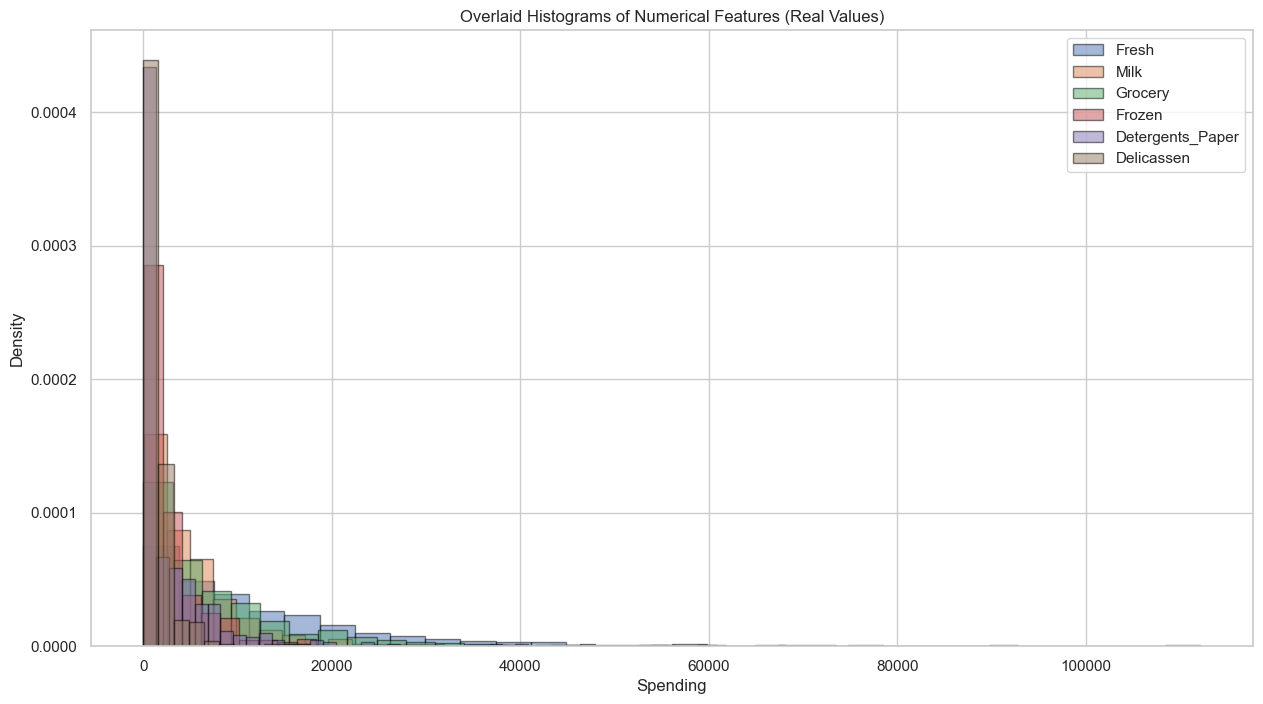

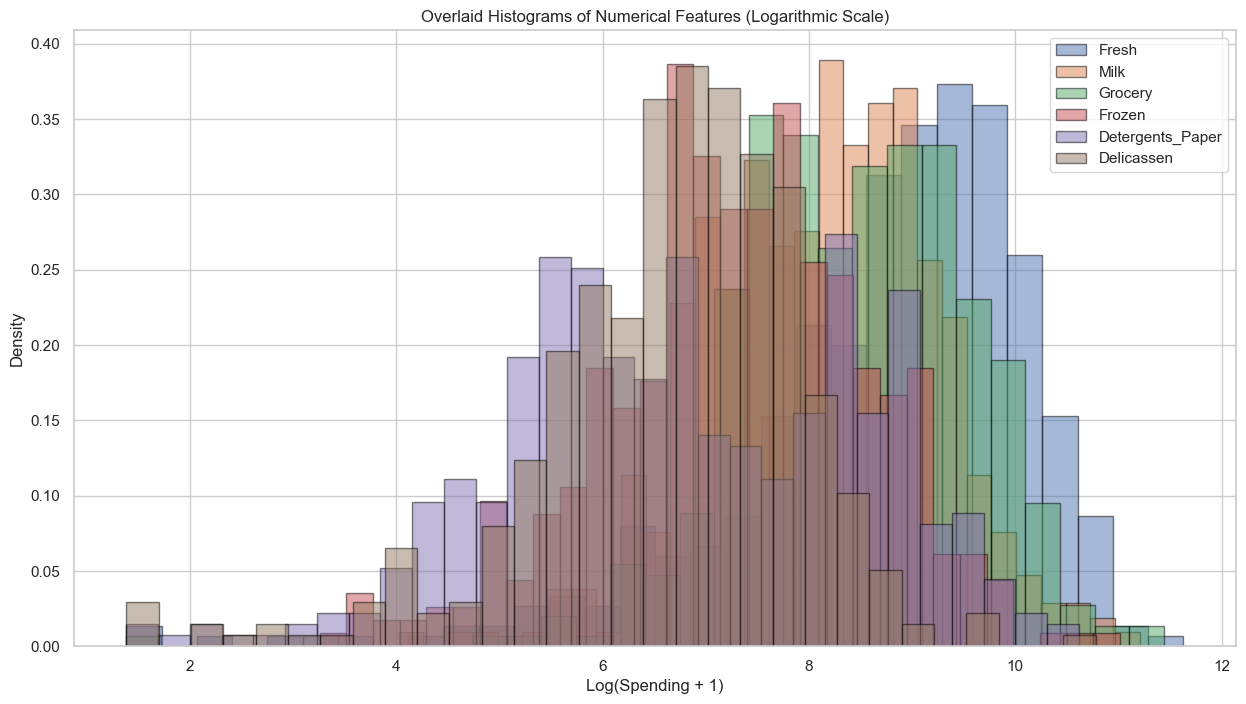

In [151]:
# Generate histogram or histograms to display distribution.
# First attempt overlaid using real values, then log

# Explicitly select the features to be plotted (excluding 'Channel' and 'Region')
selected_features = [col for col in data.columns if col not in ['Channel', 'Region']]

# Generate a single plot with overlaid histograms using real values, each distinguished by color
plt.figure(figsize=(15, 8))
for feature in selected_features:
    plt.hist(data[feature], bins=30, density=True, alpha=0.5, label=feature, edgecolor='black')
plt.title('Overlaid Histograms of Numerical Features (Real Values)')
plt.xlabel('Spending')
plt.ylabel('Density')
plt.legend()
plt.show()

# Generate a single plot with overlaid histograms using a logarithmic scale, each distinguished by color
plt.figure(figsize=(15, 8))
for feature in selected_features:
    plt.hist(np.log1p(data[feature]), bins=30, density=True, alpha=0.5, label=feature, edgecolor='black')
plt.title('Overlaid Histograms of Numerical Features (Logarithmic Scale)')
plt.xlabel('Log(Spending + 1)')
plt.ylabel('Density')
plt.legend()
plt.show()


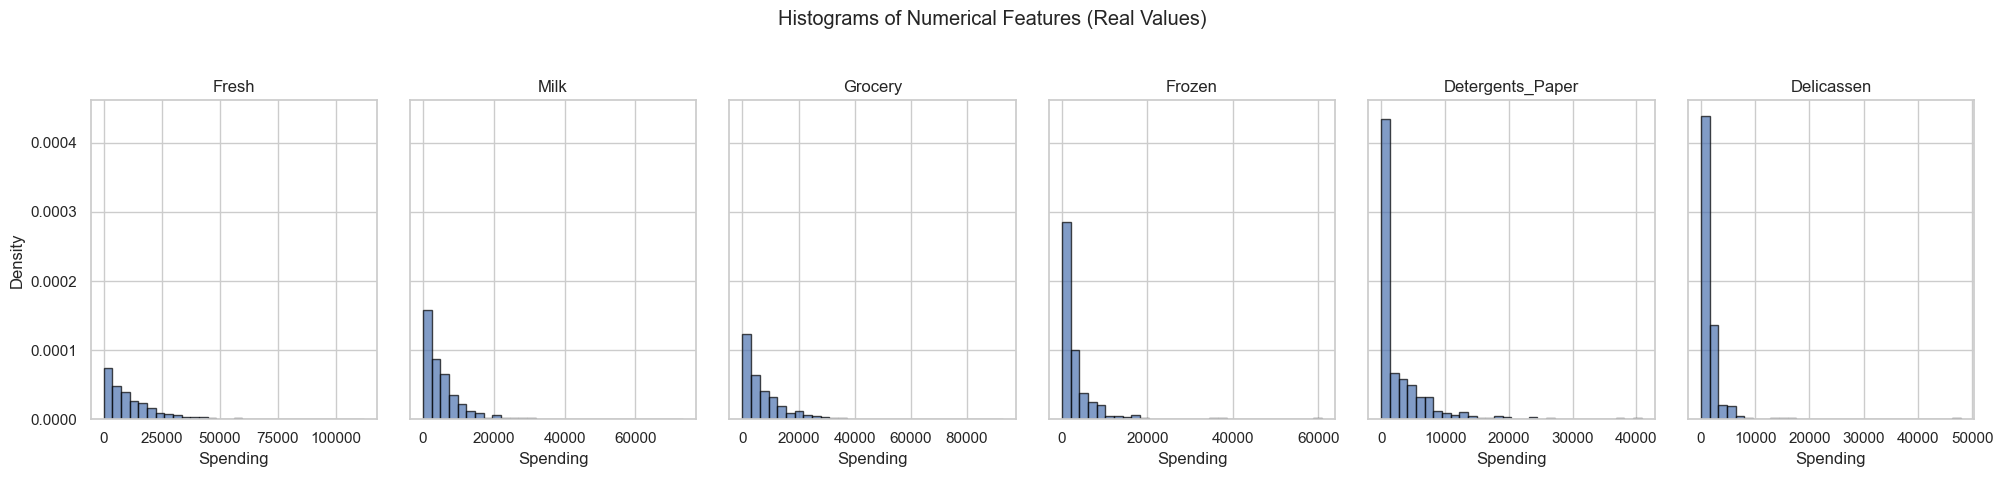

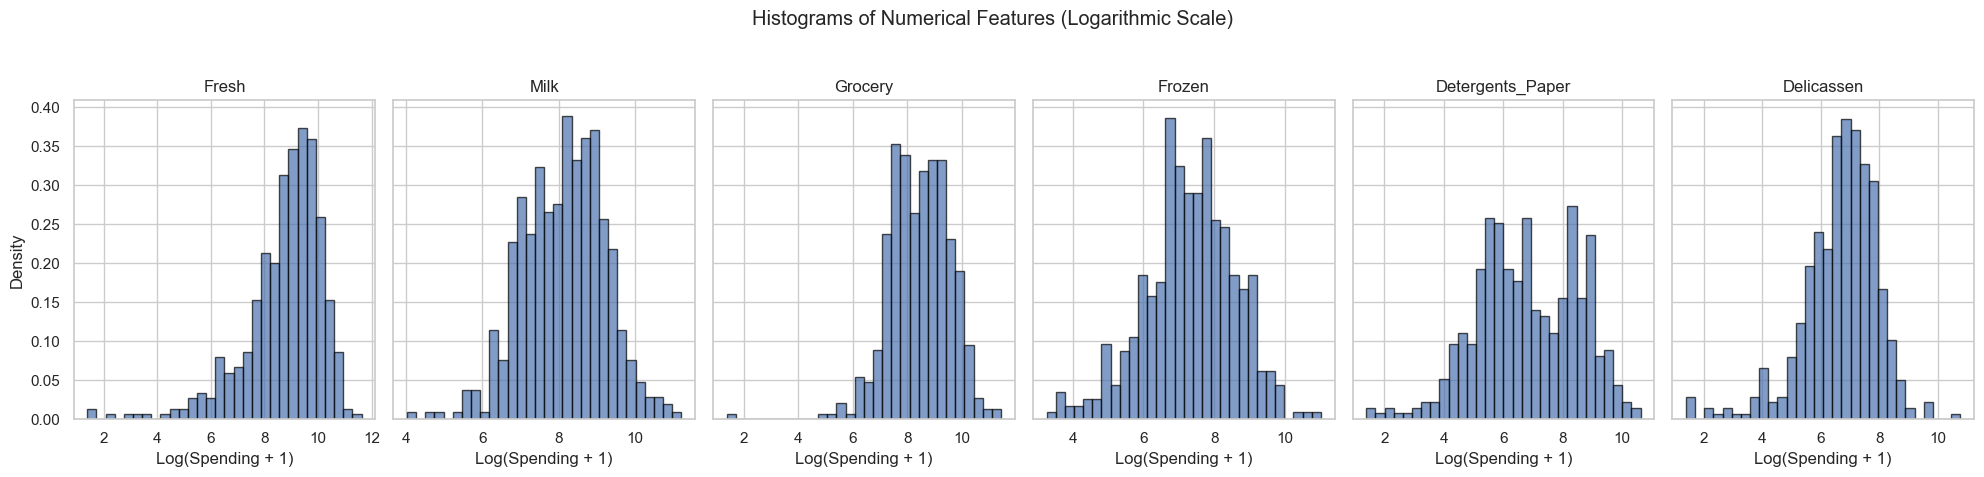

In [152]:
# Above layout is messy – try aligning side by side.

# Generate a 1x6 grid with real values, where each subplot has the same x and y axis ranges
fig, axes = plt.subplots(1, 6, figsize=(20, 5), sharey=True)
axes = axes.ravel()
for i, feature in enumerate(selected_features):
    axes[i].hist(data[feature], bins=30, density=True, alpha=0.7, edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Spending')
axes[0].set_ylabel('Density')
plt.suptitle('Histograms of Numerical Features (Real Values)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Generate a 1x6 grid with logarithmic values, where each subplot has the same x and y axis ranges
fig, axes = plt.subplots(1, 6, figsize=(20, 5), sharey=True)
axes = axes.ravel()
for i, feature in enumerate(selected_features):
    axes[i].hist(np.log1p(data[feature]), bins=30, density=True, alpha=0.7, edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Log(Spending + 1)')
axes[0].set_ylabel('Density')
plt.suptitle('Histograms of Numerical Features (Logarithmic Scale)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


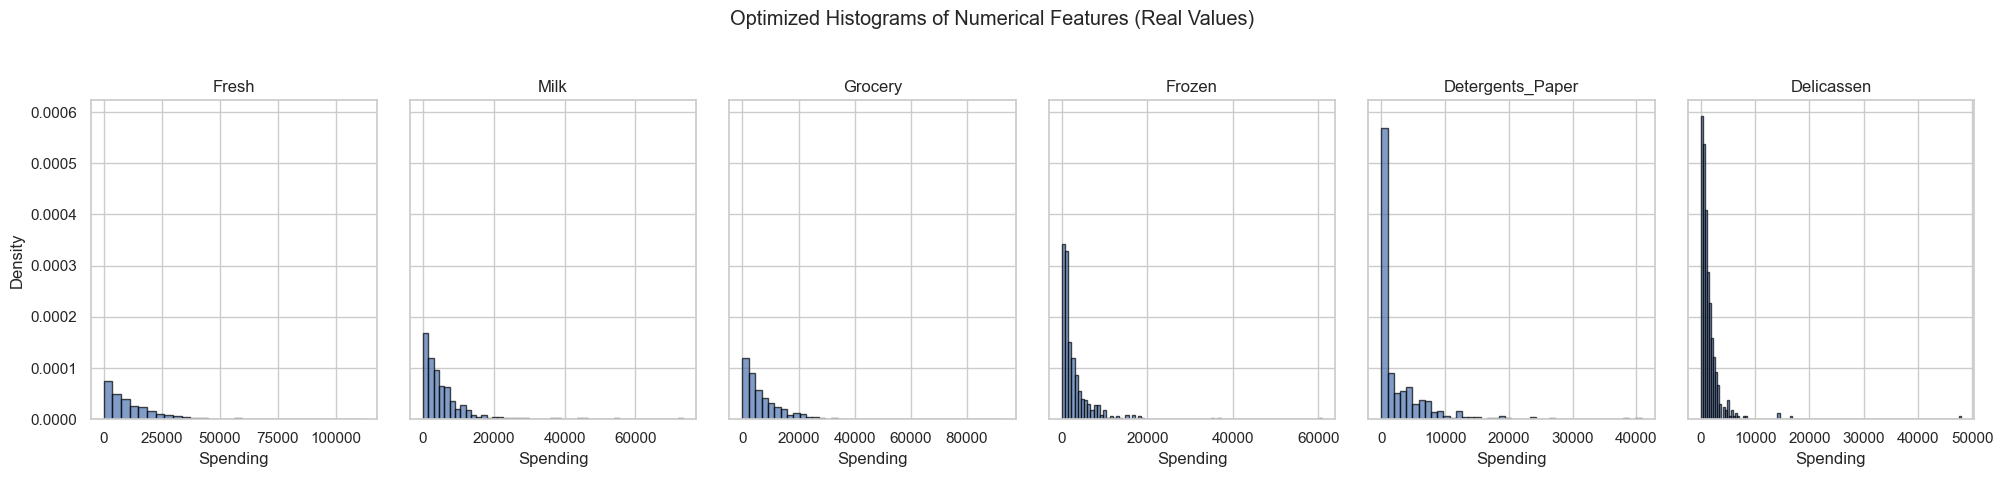

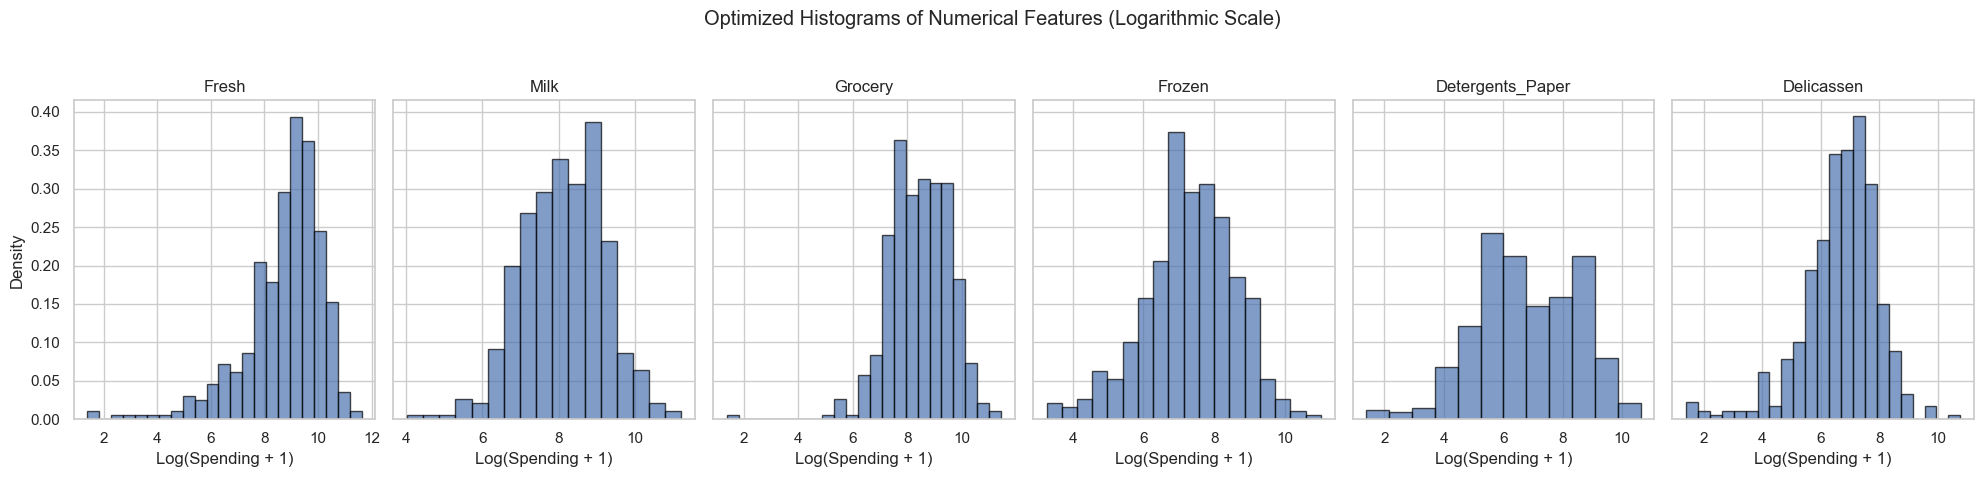

In [153]:
# Layout is improved – adjust formula to optimize bin size using Freedman-Diaconis Rule

# Function to calculate bin width using Freedman-Diaconis rule
def freedman_diaconis(data):
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    n = len(data)
    bin_width = 2 * IQR * (n ** (-1/3))
    num_bins = int((max(data) - min(data)) / bin_width)
    return num_bins

# Generate a 1x6 grid with optimized bin size using Freedman-Diaconis rule (Real Values)
fig, axes = plt.subplots(1, 6, figsize=(20, 5), sharey=True)
axes = axes.ravel()
for i, feature in enumerate(selected_features):
    num_bins = freedman_diaconis(data[feature])
    axes[i].hist(data[feature], bins=num_bins, density=True, alpha=0.7, edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Spending')
axes[0].set_ylabel('Density')
plt.suptitle('Optimized Histograms of Numerical Features (Real Values)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Generate a 1x6 grid with optimized bin size using Freedman-Diaconis rule (Logarithmic Scale)
fig, axes = plt.subplots(1, 6, figsize=(20, 5), sharey=True)
axes = axes.ravel()
for i, feature in enumerate(selected_features):
    log_data = np.log1p(data[feature])
    num_bins = freedman_diaconis(log_data)
    axes[i].hist(log_data, bins=num_bins, density=True, alpha=0.7, edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Log(Spending + 1)')
axes[0].set_ylabel('Density')
plt.suptitle('Optimized Histograms of Numerical Features (Logarithmic Scale)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


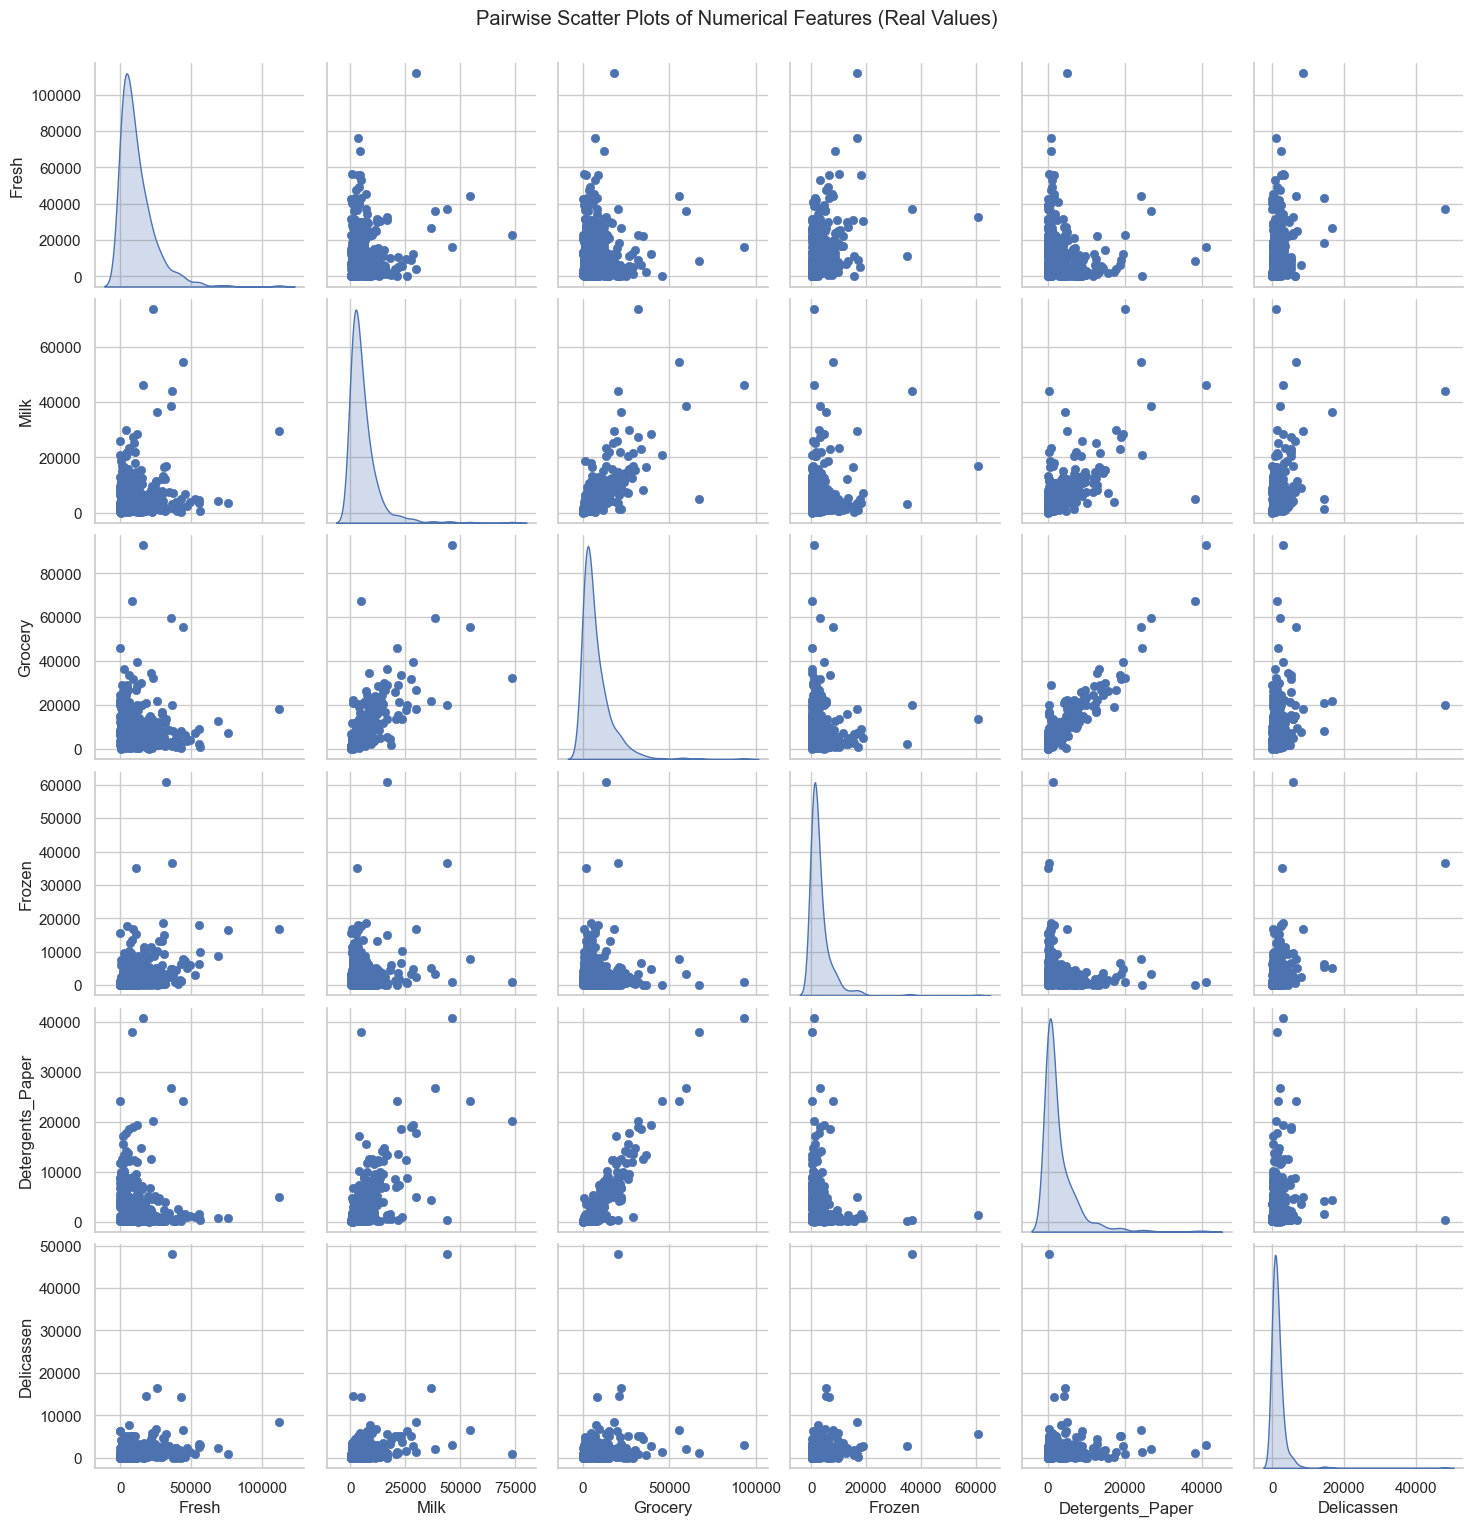

In [154]:
# Generate pairwise scatter plots to visualize relationships between variables
sns.pairplot(data[selected_features], diag_kind='kde', plot_kws={'edgecolor': None})
plt.suptitle('Pairwise Scatter Plots of Numerical Features (Real Values)', y=1.02)
plt.show()


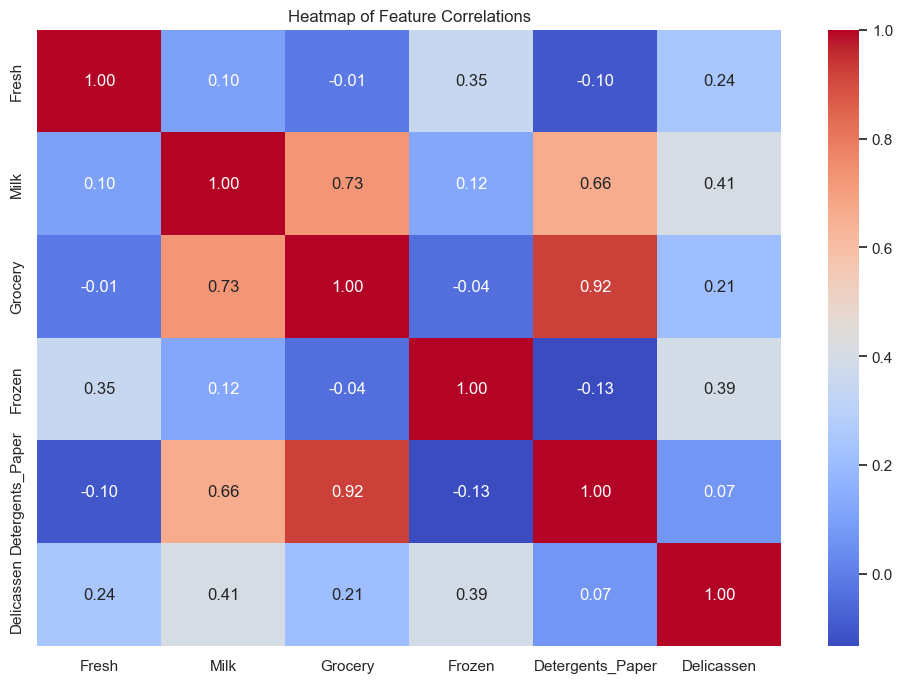

In [155]:
# Generate a correlation matrix for the selected features
correlation_matrix = data[selected_features].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

#### Observations:
Grocery and Detergents_Paper have a strong positive correlation of 0.92.

Milk also shows relatively high positive correlations with Grocery and Detergents_Paper.

In [156]:
# Standardization

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
scaled_data = scaler.fit_transform(data[selected_features])

# Create a DataFrame for the scaled features
data_scaled = pd.DataFrame(scaled_data, columns=selected_features)

# Display the first few rows of the scaled DataFrame
data_scaled.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [157]:
# Handling skewness

# Apply logarithmic transformation to handle skewness
data_log_transformed = np.log1p(data_scaled)

# Display the first few rows of the log-transformed DataFrame
data_log_transformed.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.051580,0.421055,-0.041984,-0.890056,-0.044546,-0.068642
1,-0.496433,0.434673,0.157276,-0.314897,0.082876,0.085399
2,-0.592450,0.342552,-0.028561,-0.147962,0.125073,1.176589
3,0.095411,-0.978219,-0.499188,0.523037,-0.690328,0.089302
4,0.609896,-0.053819,-0.082682,0.160296,-0.263859,0.832625


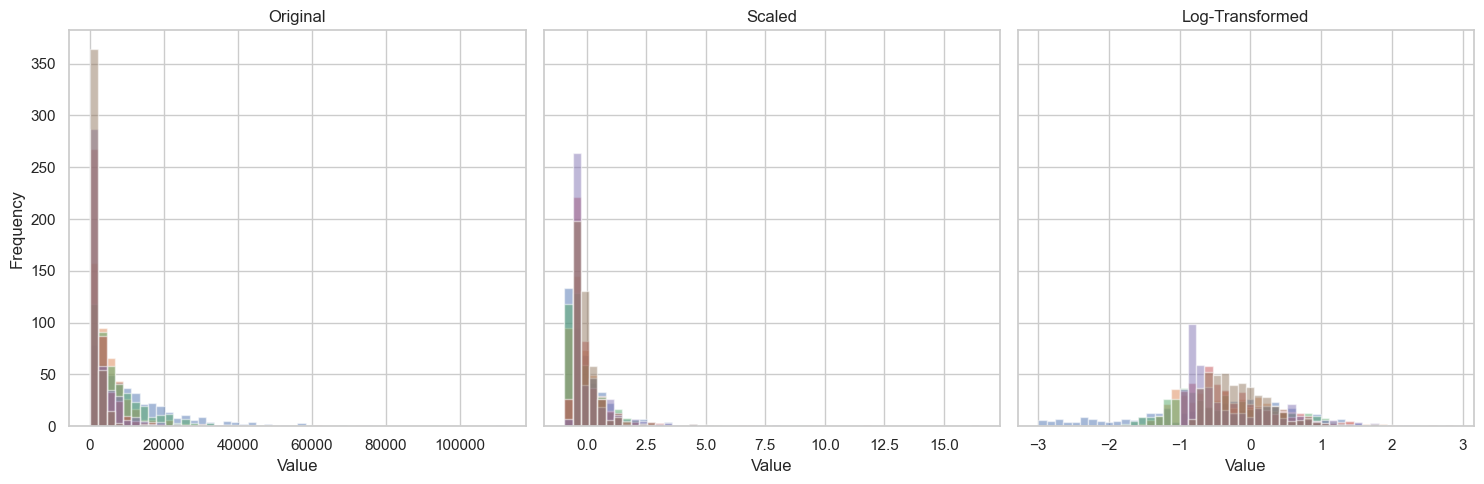

In [158]:
# Visualization of effect of data transformation steps

# Function to plot histograms for comparison
def plot_histograms(dataframes, titles):
    fig, axes = plt.subplots(1, len(dataframes), figsize=(15, 5), sharey=True)
    for i, (data, title) in enumerate(zip(dataframes, titles)):
        data.plot(kind='hist', alpha=0.5, bins=50, legend=False, ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    plt.tight_layout()

# Original data
original_data = data[selected_features]

# Plot histograms to compare the original, scaled, and log-transformed data
plot_histograms([original_data, data_scaled, data_log_transformed], ['Original', 'Scaled', 'Log-Transformed'])


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

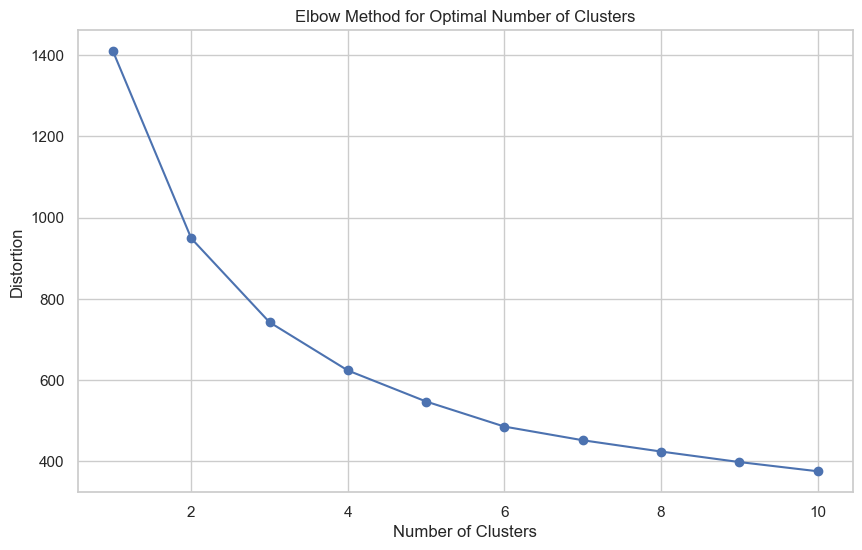

In [199]:
from sklearn.cluster import KMeans

# Function to calculate distortions for a range of cluster numbers
def calculate_distortions(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

# Calculate distortions for a range of cluster numbers (1 to 10)
max_clusters = 10
distortions = calculate_distortions(data_log_transformed, max_clusters)

# Plot the distortions to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [160]:
# Initialize the KMeans algorithm with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

# Fit the algorithm to the log-transformed data
kmeans.fit(data_log_transformed)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

# Add cluster labels to the original DataFrame for further analysis
data['Cluster_Labels'] = cluster_labels

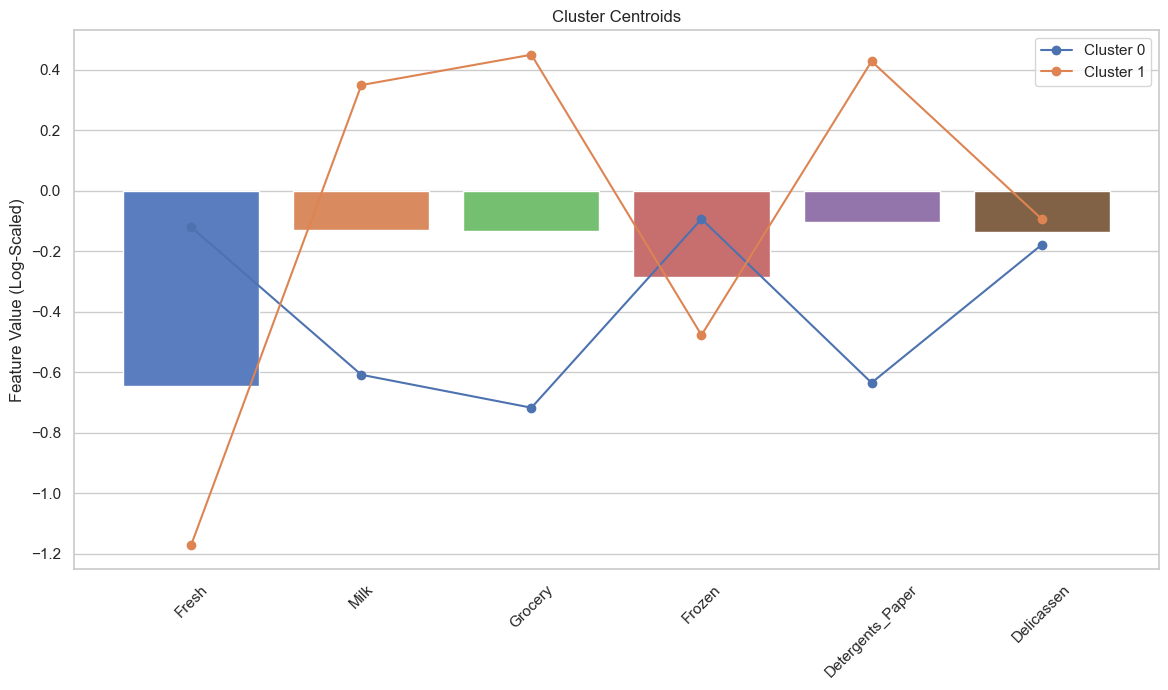

In [161]:
# Importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming cluster_centroids is the variable containing your cluster centers
# and selected_features contains the names of your features
df_centroids = pd.DataFrame(cluster_centroids, columns=selected_features)

# Plotting the cluster centroids to understand what each cluster represents
plt.figure(figsize=(14, 7))
sns.barplot(x=df_centroids.columns, y=df_centroids.mean(), errorbar="sd", palette="muted", capsize=.2)
for idx, val in enumerate(df_centroids.values):
    plt.plot(val, label=f'Cluster {idx}', marker='o', linestyle='-')
plt.legend()
plt.title('Cluster Centroids')
plt.ylabel('Feature Value (Log-Scaled)')
plt.xticks(rotation=45)
plt.show()


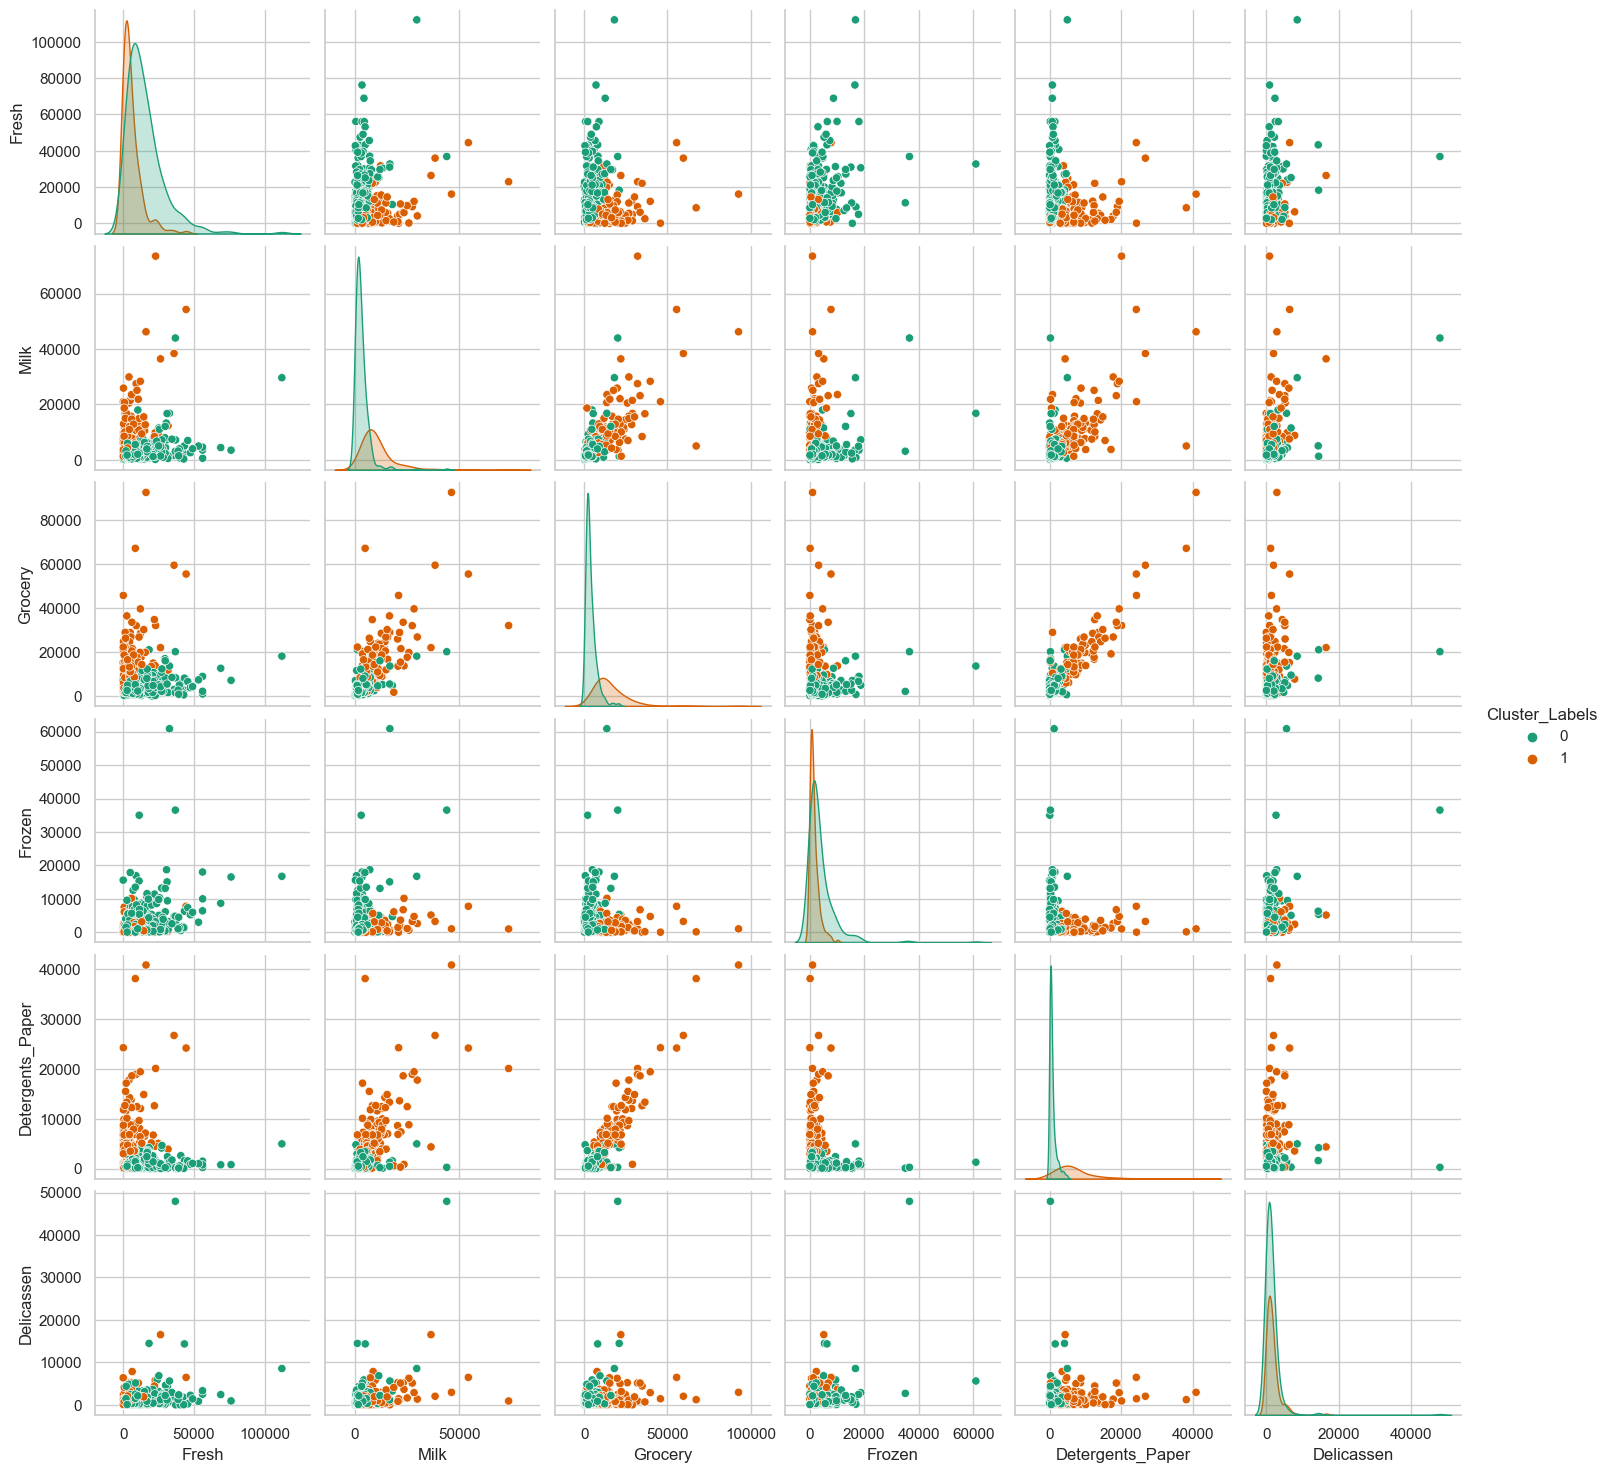

In [162]:
# Import seaborn for advanced plotting
import seaborn as sns

# Merge cluster labels with the original (or scaled) DataFrame
# data_with_labels = data.copy()
# data_with_labels['Cluster_Labels'] = cluster_labels

# Generate pairwise scatter plots colored by cluster labels
sns.pairplot(data.drop(['Channel','Region'],axis=1), hue='Cluster_Labels', palette='Dark2', diag_kind='kde')


In [163]:
# Calculate the mean values of each cluster
cluster_means = data.groupby('Cluster_Labels').mean()

# Calculate the standard deviation of each cluster
cluster_stds = data.groupby('Cluster_Labels').std()

print("Cluster Means:\n", cluster_means)
print("\nCluster Standard Deviations:\n", cluster_stds)


Cluster Means:
                  Channel    Region         Fresh          Milk       Grocery  \
Cluster_Labels                                                                 
0               1.096552  2.531034  15189.937931   3139.289655   3780.555172   
1               1.760000  2.566667   5833.660000  10933.086667  16014.673333   

                     Frozen  Detergents_Paper   Delicassen  
Cluster_Labels                                              
0               3863.627586        763.348276  1465.127586  
1               1541.320000       6976.573333  1640.373333  

Cluster Standard Deviations:
                  Channel    Region         Fresh         Milk       Grocery  \
Cluster_Labels                                                                
0               0.295857  0.780871  13653.289475  3894.635400   3244.037858   
1               0.428514  0.763396   7185.246850  9526.863975  12097.889780   

                     Frozen  Detergents_Paper   Delicassen  
Cluster_La

In [164]:
from sklearn.metrics import silhouette_score

# List of number of clusters to try
n_clusters_list = [2, 3, 4, 5, 6, 7, 8]
# Number of initializations to try for each n_clusters
n_init_list = [10, 20, 30, 40, 50, 60, 100]

best_score = -1
best_params = {}

for n_clusters in n_clusters_list:
    for n_init in n_init_list:
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
        kmeans.fit(data_log_transformed)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(data_log_transformed, cluster_labels)
        
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = {'n_clusters': n_clusters, 'n_init': n_init}

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


Best Silhouette Score: 0.32848953919368723
Best Parameters: {'n_clusters': 2, 'n_init': 10}


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

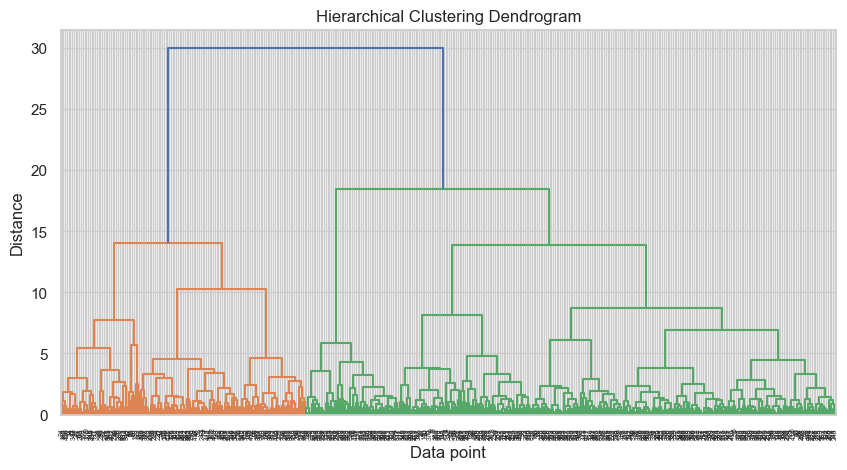

In [165]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix using 'ward' method
Z = linkage(data_log_transformed, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

# Fitting the model
agg_clustering = AgglomerativeClustering(n_clusters=2, metric='manhattan', linkage='average')
agg_labels = agg_clustering.fit_predict(data_log_transformed)

# Adding labels to the original DataFrame
data['Agg_Cluster_Labels'] = agg_labels


In [166]:
# Calculate the mean values of each cluster
cluster_means = data.groupby('Agg_Cluster_Labels').mean()

# Calculate the standard deviation of each cluster
cluster_stds = data.groupby('Agg_Cluster_Labels').std()


In [167]:
cluster_means
cluster_stds

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_Labels
Agg_Cluster_Labels,,,,,,,,,
0,0.457738,0.736788,26778.453987,19419.657387,21754.043444,16847.569180,12675.259884,11870.890613,0.457738
1,0.462309,0.776314,11565.949482,4696.561917,6486.048013,3630.544341,3268.435731,1364.949315,0.469692


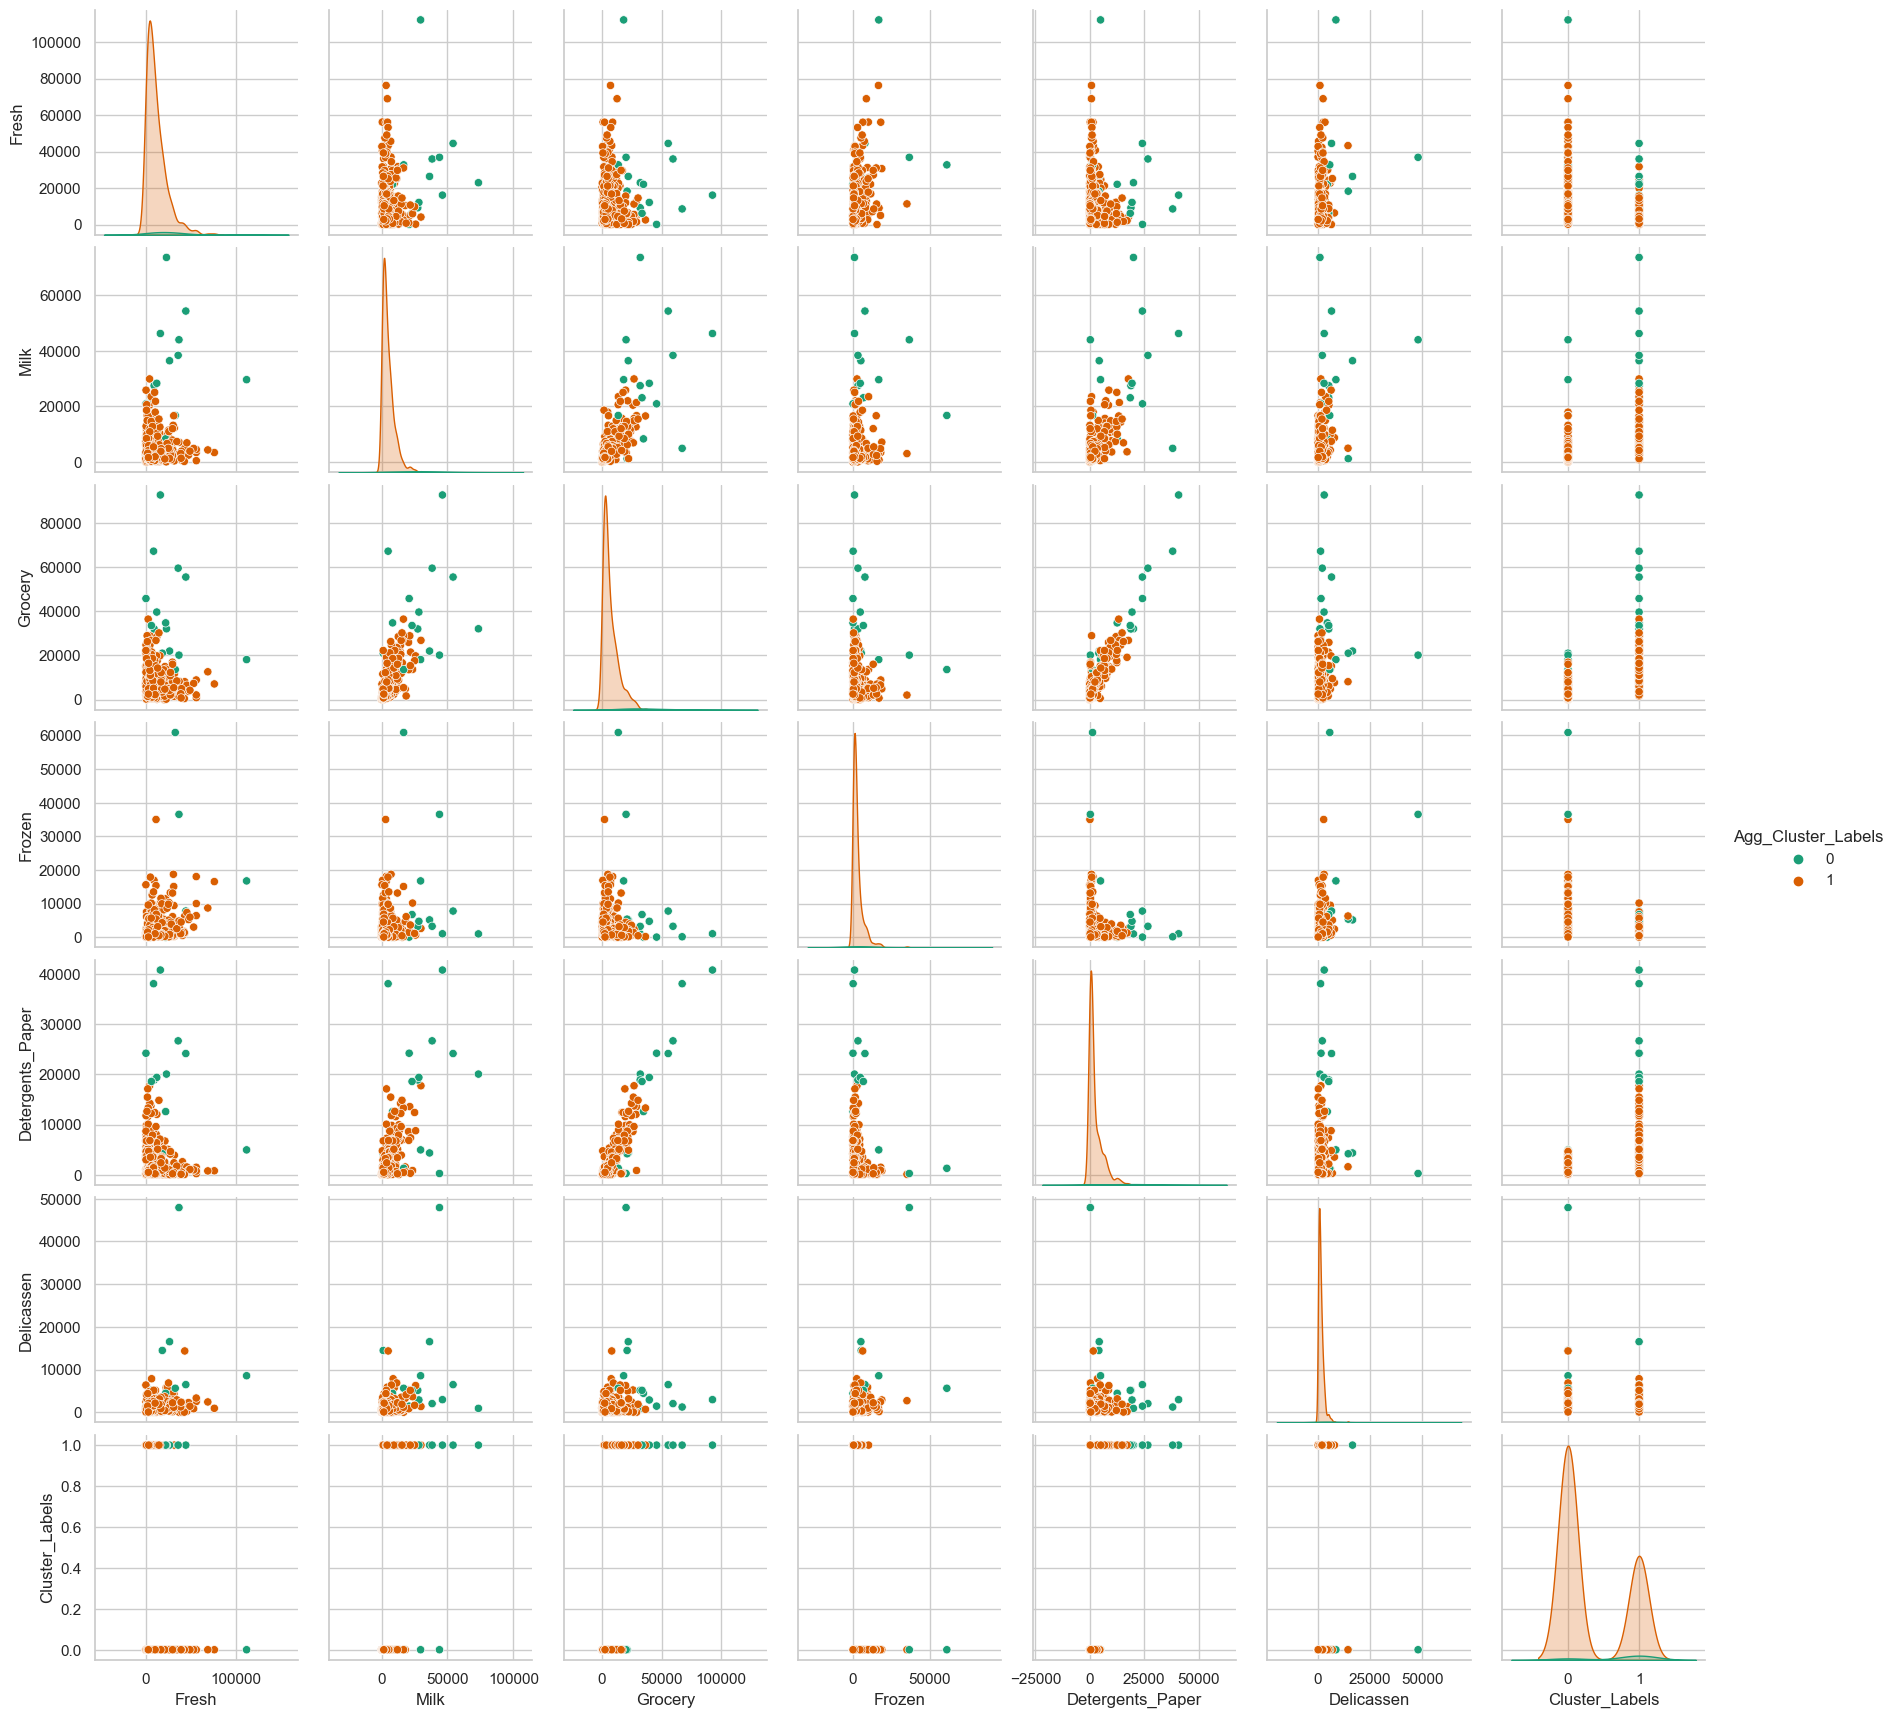

In [168]:
sns.pairplot(data.drop(['Channel','Region'], axis=1), hue='Agg_Cluster_Labels', palette='Dark2', diag_kind='kde')


In [169]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_log_transformed, agg_labels)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.41632077784173044


In [170]:
best_score = -1
best_params = {}
linkage_methods = ['ward', 'complete', 'average']
affinities = ['euclidean', 'manhattan', 'cosine']
n_clusters_range = range(2, 11)  # Trying from 2 to 10 clusters

for n_clusters in n_clusters_range:
    for link_method in linkage_methods:
        for metric in affinities:
            # 'ward' can only work with 'euclidean'
            if link_method == 'ward' and metric != 'euclidean':
                continue
            agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=link_method)
            agg_labels = agg_clustering.fit_predict(data_log_transformed)
            
            # Skip if all points end up in a single cluster, as silhouette_score can't be computed in that case
            if len(set(agg_labels)) == 1:
                continue
            
            silhouette_avg = silhouette_score(data_log_transformed, agg_labels)
            
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'linkage': link_method, 'metric': metric}

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)



Best Silhouette Score: 0.41632077784173044
Best Parameters: {'n_clusters': 2, 'linkage': 'average', 'metric': 'manhattan'}


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [171]:
from sklearn.decomposition import PCA

# Initialize PCA and the X vector for dimensionality reduction
pca = PCA()

# Apply PCA
pca_result = pca.fit_transform(data_log_transformed)


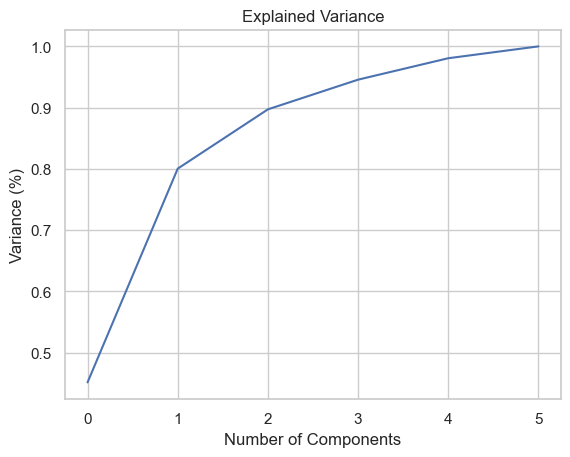

In [172]:
# Plotting explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


In [173]:
# Initialize PCA with the first 2 components
pca_2 = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca_2.fit_transform(data_log_transformed)


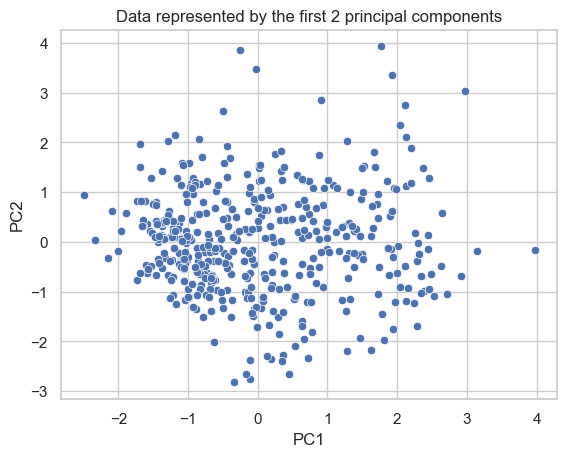

In [174]:
# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(reduced_data_pca, columns=['PC1', 'PC2'])

# Scatter plot for the first two principal components
sns.scatterplot(data=reduced_data_df, x='PC1', y='PC2')
plt.title('Data represented by the first 2 principal components')
plt.show()


In [175]:
from sklearn.metrics import silhouette_score

best_score = -1
best_n_components = None

# Loop through different numbers of components
for n in range(1, len(selected_features) + 1):
    
    # Apply PCA with n components
    pca_n = PCA(n_components=n)
    reduced_data_pca_n = pca_n.fit_transform(data_log_transformed)
    
    # Perform clustering on the reduced data
    kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)  # Using 2 clusters based on earlier results
    kmeans.fit(reduced_data_pca_n)
    labels = kmeans.labels_
    
    # Calculate silhouette score
    score = silhouette_score(reduced_data_pca_n, labels)
    
    if score > best_score:
        best_score = score
        best_n_components = n

print("Best Silhouette Score:", best_score)
print("Best number of components:", best_n_components)


Best Silhouette Score: 0.6227486122562556
Best number of components: 1


In [176]:
# Apply PCA with 1 component
pca_1 = PCA(n_components=1)
pca_1.fit(data_log_transformed)

# Get the component's coefficients (loadings)
loadings = pca_1.components_

# Create a DataFrame for easier interpretation
loadings_df = pd.DataFrame(loadings, columns=selected_features, index=['PC1'])
print(loadings_df)


        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
PC1 -0.575665  0.405031  0.508806 -0.192575          0.454786    0.041963


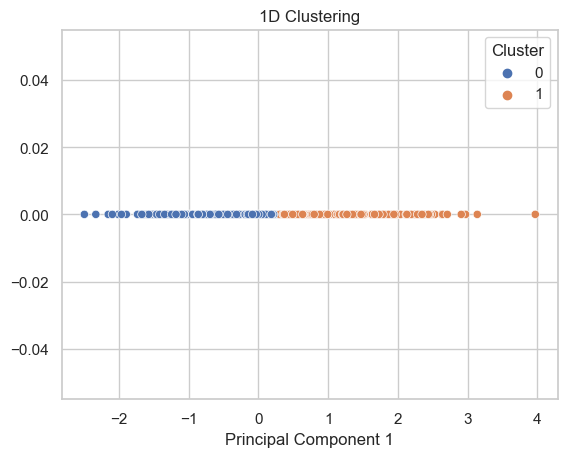

In [204]:
# Transform the data to 1D
reduced_data_1D = pca_1.transform(data_log_transformed)

# Perform clustering on the 1D data
kmeans_1D = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_1D.fit(reduced_data_1D)
labels_1D = kmeans_1D.labels_

# Create a DataFrame for visualization
df_1D = pd.DataFrame({'Principal Component 1': reduced_data_1D.flatten(), 'Cluster': labels_1D})

# Plotting
sns.scatterplot(x='Principal Component 1', y=[0]*len(df_1D), hue='Cluster', data=df_1D)
plt.title('1D Clustering')
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. After hyperparamater tuning, our clustering models both found optimized silhouette scores using two clusters. 

2. Our KMeans model identified one cluster defined primarily by their purchases of Fresh Products, also finding that they were comparatively more likely to purchase frozen foods.

3. Our PCA suggests the optimum number of components is one, and an assessment of the model's coefficients suggest a similar interpretation to our KMeans model.

4. Though there is legitimate insight to be drawn from each of these results regarding cross-category purchasing behavior, the affect of outliers on this data ought to be investigated further